In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

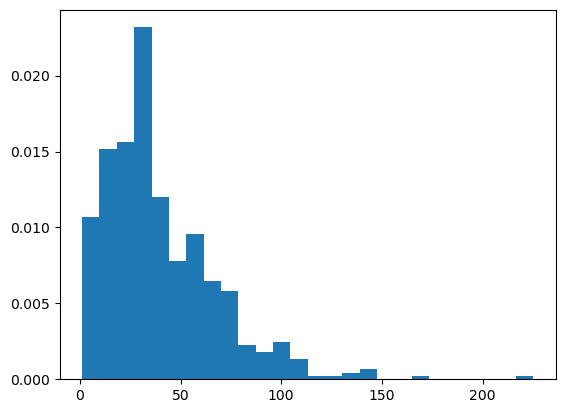

In [2]:
# exercise 0
# fitting a power law to the distribution of black holes detected by GW:

# Loading up the data
gwtc1=pd.read_csv("gwtc1.csv")

# collecting masses
masses=np.concatenate((gwtc1.mass_1_source, gwtc1.mass_2_source, gwtc1.final_mass_source))

# need their histograms
h,location,_=plt.hist(masses, bins='auto', density=True)
#get the x values of the middle of each bin
x=location[0:-1]+np.diff(location)/2

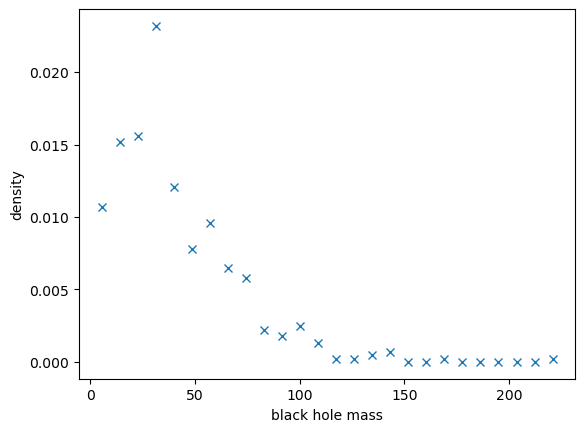

In [3]:
# plot density as function of mass
plt.plot(x,h,'x')
plt.xlabel("black hole mass")
plt.ylabel("density");

In [4]:
def powerlaw(x, alpha, K):
    '''
    define a power law function
    '''
    return K*x**(-alpha)

# curve fit
# fit the data ignoring the first two points
p_init=np.array([2.5, 0.015])
popt, pcov = curve_fit(f=powerlaw, xdata=x[2:], ydata=h[2:], p0=p_init)

/var/folders/bt/zzd2l67j1_q8rr67lxy61gzc0000gn/T/ipykernel_67440/885736908.py:5: RuntimeWarning: overflow encountered in power
  return K*x**(-alpha)


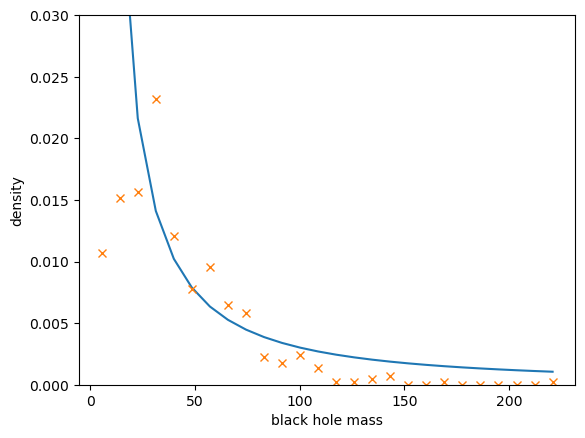

In [5]:
# plot
plt.plot(x, powerlaw(x, *popt))
plt.plot(x, h, 'x')
#plt.xlim([20,225])
plt.ylim([0,0.03])
plt.xlabel("black hole mass")
plt.ylabel("density");

slope:  99.0595238095238 +/- 0.9295121405070308
intercept:  6.1666666666665995 +/- 3.888428260701789



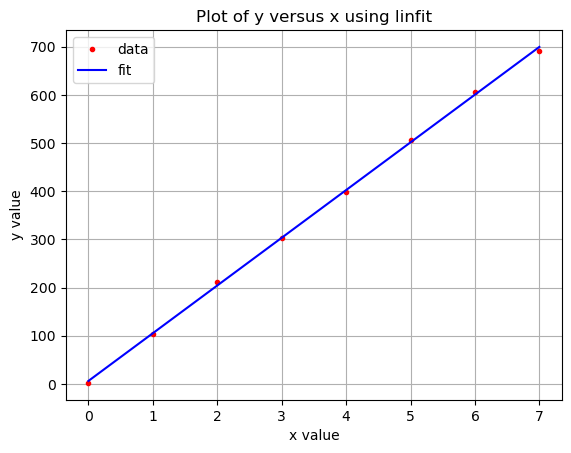

In [6]:
# put some test data into arrays ...
x_data = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ]) 
y_data = np.array([ 2, 104, 212, 302, 398, 507, 606, 692 ])

# define a nice, self-contained fitting routine.
def linfit(x, y):
    '''
    Takes input arrays x an y and performs a linear least squares fit.
    Returns estimated slope, error is slope, 
    intercept, error in intercept.
    '''
    # do LSF using method described in PX1224 week 4 ...
    p_coeff, residuals, _, _, _ = np.polyfit(x, y, 1, full=True)
    # Note: residuals is returned as an array with one element.
    # residuals[0] is the value of this element
    n = len(x)
    D = sum(x**2) - 1./n * sum(x)**2
    x_bar = np.mean(x)
    dm_squared = 1./(n-2)*residuals[0]/D
    dc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals[0]/D
    dm = np.sqrt(dm_squared)
    dc = np.sqrt(dc_squared)
    return p_coeff[0], dm, p_coeff[1], dc

# Calling the fitting function:
m, dm, c, dc = linfit(x_data, y_data)
print ('slope: ', m, '+/-', dm) 
print ('intercept: ', c, '+/-', dc) 
print ()

# Now for plotting purposes, we define a linear function
def linear(x, m, c): 
    return m*x + c

# alternative method to define the linear function
# (effectively, it's identical to the other method 
# *p means just a list of values)
def linear(x, *p):
    return p[0]*x + p[1]

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
x_plot = np.linspace(min(x_data),max(x_data),num=100)
plt.plot(x_plot, linear(x_plot, m, c), 'b-',label='fit') 
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using linfit')
plt.legend()
plt.grid ()

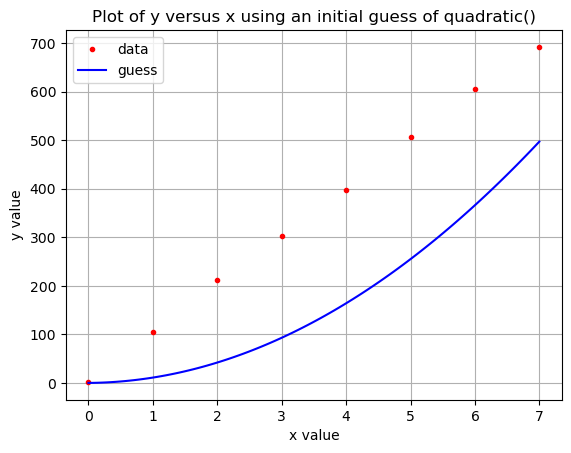

In [7]:
def quadratic(x, *p):
    return p[0]*x**2 + p[1]*x + p[2]

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# compute a guess curve by creating an array y_guess of data points.
p_guess = np.array([10.0, 1.0, 0.0]) # initial guess 
y_guess = quadratic(x_plot, *p_guess) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, y_guess, 'b-',label='guess') 
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using an initial guess of quadratic()')
plt.legend()
plt.grid ()

a:  -0.5297619047848734 +/- 0.4506307851210509
b:  102.76785714307913 +/- 3.280641210940977
c:  2.458333333338645 +/- 4.91580329432674



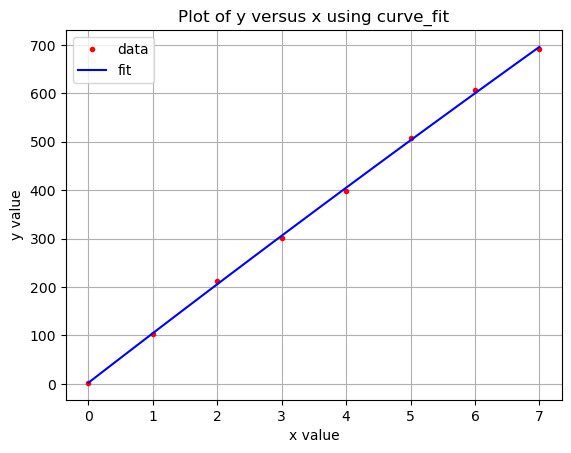

In [8]:
# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(quadratic, x_data, y_data, p_guess) # do fit

print ('a: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0])) 
print ('b: ', popt[1], '+/-', np.sqrt(pcov.diagonal()[1])) 
print ('c: ', popt[2], '+/-', np.sqrt(pcov.diagonal()[2])) 
print ()

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# find fitted curve by creating an array yfit of data points ...
yfit = quadratic(x_plot, *popt)

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, yfit, 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using curve_fit')
plt.legend()
plt.grid ()

m (slope): 99.06 +/- 0.93
c (intercept): 6.17 +/- 3.89

m (slope): 99.06 +/- 0.93
c (intercept): 6.17 +/- 3.89


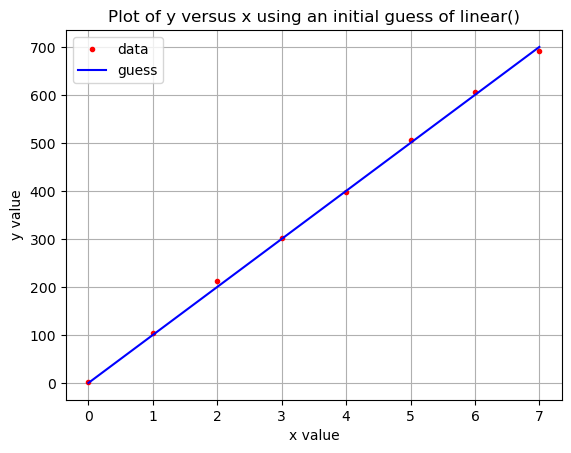

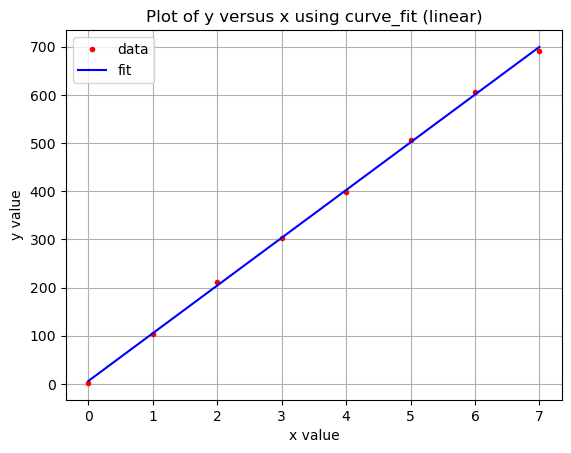

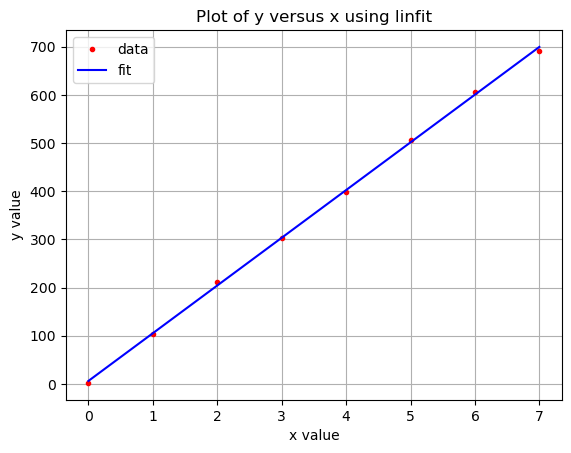

In [9]:
# exercise 1

# define linear function
def linear(x,m,c):
    '''
    y=mx+c
    '''
    y=m*x+c
    return y

# put some test data into arrays (same from before)
x_data = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ]) 
y_data = np.array([ 2, 104, 212, 302, 398, 507, 606, 692 ])

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# compute a guess line by creating an array y_guess of data points.
p_guess = np.array([100.0, 0.0]) # initial guess for m and c
y_guess = linear(x_plot, *p_guess) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot guess data
plt.plot(x_plot, y_guess, 'b-',label='guess') 
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using an initial guess of linear()')
plt.legend()
plt.grid ()

# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(linear, x_data, y_data, p_guess) # do fit
m,c = popt
# uncertanties of m and c
dm, dc =  np.sqrt(pcov.diagonal())

print(f"m (slope): {m:.2f} +/- {dm:.2f}")
print(f"c (intercept): {c:.2f} +/- {dc:.2f}")
print ()

#plot fitted line
# find fitted curve by creating an array yfit of data points ...
yfit = linear(x_plot, *popt)

# plot 
plt.figure()
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, yfit, 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using curve_fit (linear)')
plt.legend()
plt.grid ()





# not necassary but can also confirm usinbg linfit (week2)
# define a nice, self-contained fitting routine.
def linfit(x, y):
    '''
    Takes input arrays x an y and performs a linear least squares fit.
    Returns estimated slope, error is slope, 
    intercept, error in intercept.
    '''
    # do LSF using method described in PX1224 week 4 ...
    p_coeff, residuals, _, _, _ = np.polyfit(x, y, 1, full=True)
    # Note: residuals is returned as an array with one element.
    # residuals[0] is the value of this element
    n = len(x)
    D = sum(x**2) - 1./n * sum(x)**2
    x_bar = np.mean(x)
    dm_squared = 1./(n-2)*residuals[0]/D
    dc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals[0]/D
    dm = np.sqrt(dm_squared)
    dc = np.sqrt(dc_squared)
    return p_coeff[0], dm, p_coeff[1], dc

# Calling the fitting function:
m, dm, c, dc = linfit(x_data, y_data)
print(f"m (slope): {m:.2f} +/- {dm:.2f}")
print(f"c (intercept): {c:.2f} +/- {dc:.2f}")

# Now for plotting purposes, we define a linear function
def linear(x, m, c): 
    return m*x + c

# alternative method to define the linear function
# (effectively, it's identical to the other method 
# *p means just a list of values)
def linear(x, *p):
    return p[0]*x + p[1]

# plot data
plt.figure()
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
x_plot = np.linspace(min(x_data),max(x_data),num=100)
plt.plot(x_plot, linear(x_plot, m, c), 'b-',label='fit') 
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using linfit')
plt.legend()
plt.grid ()

In [10]:
# load in data 
# i had to use pandas because ! wget -q wasnt working and didnt know how to download locally
# skipping first row because it is just text
xrd_datafile=pd.read_csv("https://raw.githubusercontent.com/PX2134/data/master/week4/XRD_data_Mo_anode.csv", \
                    skiprows=1)

In [11]:
xrd_datafile

,# angle/deg,CR /s
0,2.00,4.2
1,2.02,3.4
2,2.04,3.4
3,2.06,4.6
4,2.08,2.4
...,...,...
1631,34.92,6.6
1632,34.94,10.4
1633,34.96,9.8
1634,34.98,9.6


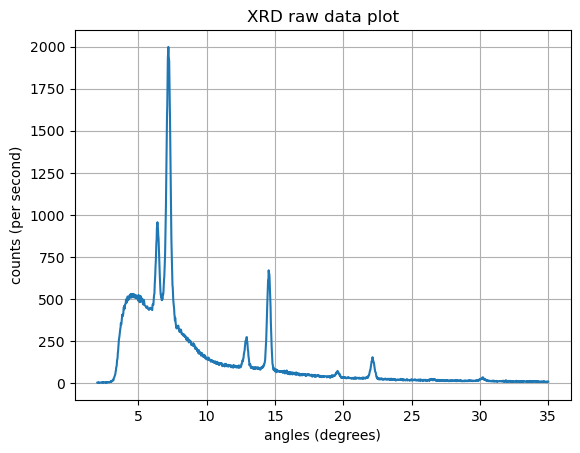

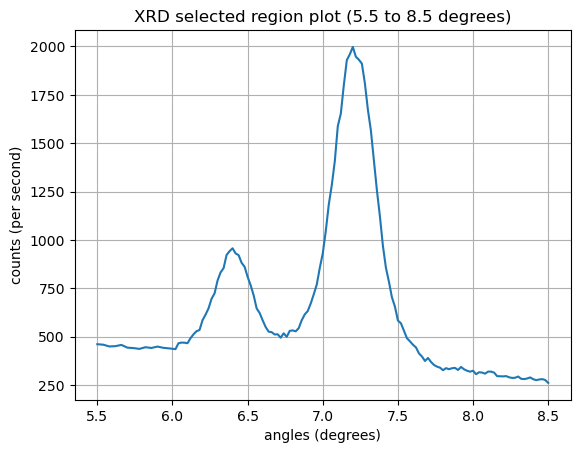

In [12]:
# exercise 2
# organise data
xrd_data=np.array(xrd_datafile)
angles=xrd_data[:,0] # all rows from first column (angles)
counts=xrd_data[:,1] # all rows from second column (counts)

# 1
#plot data 
plt.plot(angles,counts)
plt.xlabel('angles (degrees)')
plt.ylabel('counts (per second)')
plt.title('XRD raw data plot')
plt.grid();

# estimates for peaks ??
# peak at around 6,7,13,14.5,19.5(mini),22, mini 26 and 30 maybe..
# biggest peaks around 6 and 7 degrees for around 900 and 2000 counts/second
# widths maybe 0.1-0.2?? intensity is i think the counts
# other peaks are higher orders

# creating array and only selecting data that includes these two peaks
# going from 5.5 to 8.5, includes 6 and 7 plus extra
# i did 5.5 to 7.5 at first but it cut too short imo
angles_selected= angles[(angles>=5.5)&(angles<=8.5)]
counts_selected= counts[(angles>=5.5)&(angles<=8.5)]

# plot selected parts
plt.figure()
plt.plot(angles_selected, counts_selected)
plt.xlabel('angles (degrees)')
plt.ylabel('counts (per second)')
plt.title('XRD selected region plot (5.5 to 8.5 degrees)')
plt.grid();

I (area): 1881.74 +/- 98.95
mu (deg): 7.02 +/- 0.04
sigma (deg): 0.70 +/- 0.04



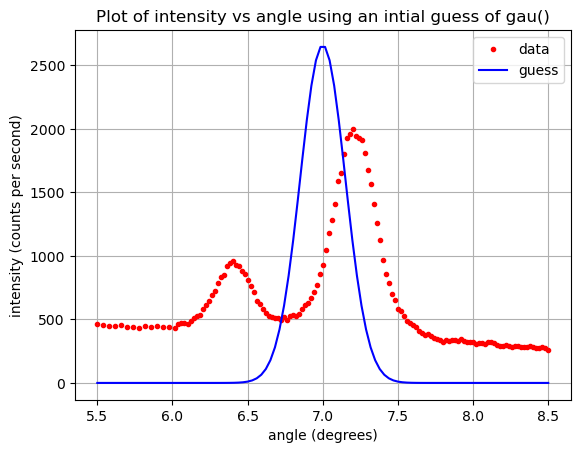

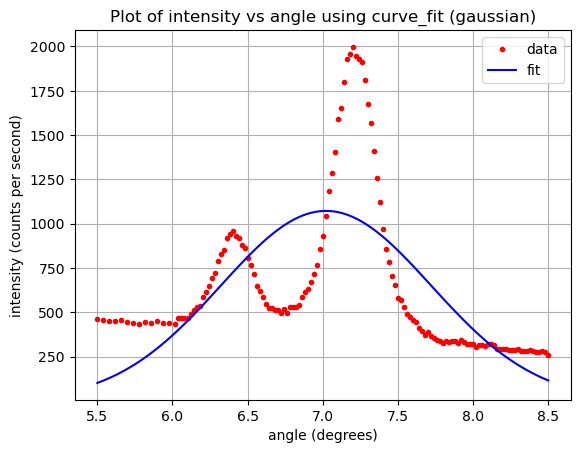

In [13]:
# 2: defining gaussian 

def gau(x, intensity, mu, sigma):
    '''
    G(x;I,mu,sigma) = I * (1/sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2))
    '''
    return intensity * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))

# 3: use curve fit (plus guesses)

# define x and y data
x_data_gau = angles_selected
y_data_gau = counts_selected

x_plot_gau = np.linspace(min(x_data_gau),max(x_data_gau),num=100)

# compute a guess line by creating an array y_guess of data points.

# intensity is area under the curve
I_guess = 1000 # changed this as i went idk

# centre at tallest point (7 degrees)
mu_guess = 7.0

# width guess in degrees
sigma_guess = 0.15 #(between 0.1 and 0.2)

p_guess_gau = np.array([I_guess, mu_guess, sigma_guess]) # initial guesses for I, mu, and sigma
y_guess_gau = gau(x_plot_gau, *p_guess_gau) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot guess data
plt.plot(x_plot_gau, y_guess_gau, 'b-',label='guess') 
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('Plot of intensity vs angle using an intial guess of gau()')
plt.legend()
plt.grid ()

# this looks off but its just a guess

# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(gau, x_data_gau, y_data_gau, p_guess_gau) # do fit
I, mu_, sigma_ = popt
# uncertanties of I, mu, and sigma
dI, dmu, dsigma =  np.sqrt(pcov.diagonal())

print(f"I (area): {I:.2f} +/- {dI:.2f}")
print(f"mu (deg): {mu_:.2f} +/- {dmu:.2f}")
print(f"sigma (deg): {sigma_:.2f} +/- {dsigma:.2f}")
print ()

x_plot_gau = np.linspace(min(x_data_gau),max(x_data_gau),num=100)

#plot fitted line
# find fitted curve by creating an array yfit of data points ...
yfit_gau = gau(x_plot_gau, *popt)

# plot 
plt.figure()
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot fit
plt.plot(x_plot_gau, yfit_gau, 'b-',label='fit')
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('Plot of intensity vs angle using curve_fit (gaussian)')
plt.legend()
plt.grid ();

Gaussian + background
I (area): 511.05 +/- 22.29
mu (deg): 7.21 +/- 0.01
sigma (deg): 0.13 +/- 0.01
B (counts per second): 469.99 +/- 15.89



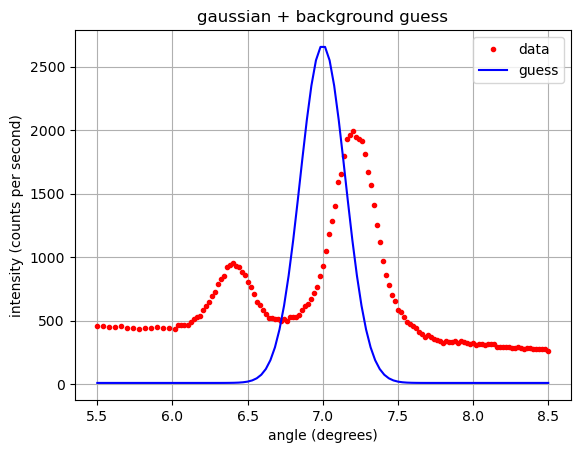

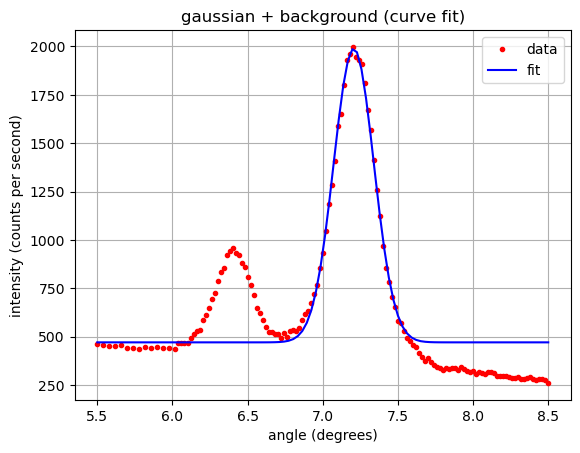

In [14]:
'''
4.
[3] Repeat, but allowing for a constant background offset to improve the fit. 
Hint: Do this by defining a fitting function comprising a constant term plus a Gaussian, 
say Gau_background(x, intensity, mu, sigma, bckg). 
(You can call the Gau() function from within Gau_background(). 
You now have four fitting parameters instead of three.)
'''
 # define gauss + background
def gau_b(x, intensity, mu, sigma, b):
    '''
    G(x;I,mu,sigma) = I * (1/sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2)) + background
    '''
    return intensity * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2)) + b

b_guess= 10

p_guess_gau_bg = np.array([I_guess, mu_guess, sigma_guess, b_guess]) # initial guesses for I, mu, and sigma
y_guess_gau_bg = gau_b(x_plot_gau, *p_guess_gau_bg) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot guess data
plt.plot(x_plot_gau, y_guess_gau_bg, 'b-',label='guess') 
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + background guess')
plt.legend()
plt.grid ()


# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(gau_b, x_data_gau, y_data_gau, p_guess_gau_bg) # do fit
I_bg, mu_bg, sigma_bg, B = popt
# uncertanties of I, mu, and sigma
dI_bg, dmu_bg, dsigma_bg, dB =  np.sqrt(pcov.diagonal())

print("Gaussian + background")
print(f"I (area): {I_bg:.2f} +/- {dI_bg:.2f}")
print(f"mu (deg): {mu_bg:.2f} +/- {dmu_bg:.2f}")
print(f"sigma (deg): {sigma_bg:.2f} +/- {dsigma_bg:.2f}")
print(f"B (counts per second): {B:.2f} +/- {dB:.2f}")
print()

#plot fitted line
x_plot_gau_bg = np.linspace(min(x_data_gau),max(x_data_gau),num=100)

# find fitted curve by creating an array yfit of data points ...
yfit_gau_bg = gau_b(x_plot_gau_bg, *popt)

# plot 
plt.figure()
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot fit
plt.plot(x_plot_gau, yfit_gau_bg, 'b-',label='fit')
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + background (curve fit)')
plt.legend()
plt.grid ();

Gaussian + linear
I (area): 522.01 +/- 17.29
mu (deg): 7.21 +/- 0.00
sigma (deg): 0.14 +/- 0.00
m (slope): -125.66 +/- 12.89
c (intercept): 1360.32 +/- 92.15



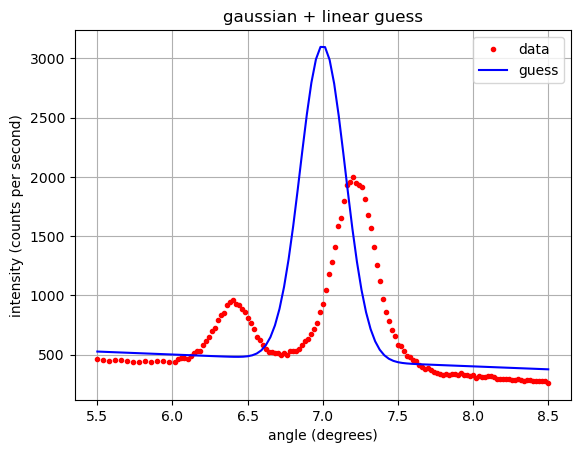

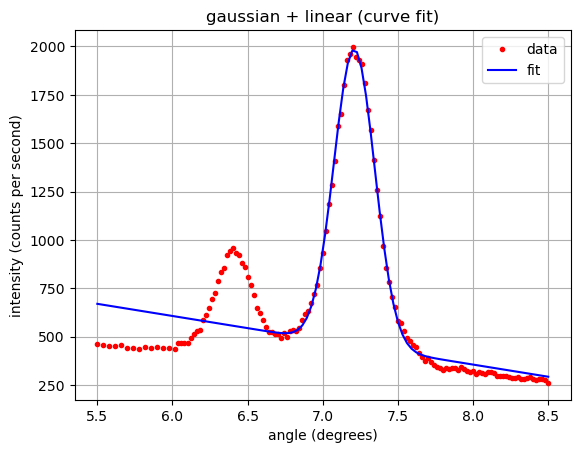

In [15]:
'''
5.
[4] Repeat, but allowing for a linear background to improve the fit. 
(This requires a function with an extra fitting parameter.)
'''
def gau_linear(x, intensity, mu, sigma, m_gau, c_gau):
    return gau(x, intensity, mu, sigma) + m_gau*x + c_gau

m_gau_guess = -50
c_gau_guess = 800

p_guess_gau_ln = np.array([I_guess, mu_guess, sigma_guess, m_gau_guess, c_gau_guess]) # initial guesses for I, mu, m and c
y_guess_gau_ln = gau_linear(x_plot_gau, *p_guess_gau_ln) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot guess data
plt.plot(x_plot_gau, y_guess_gau_ln, 'b-',label='guess') 
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + linear guess')
plt.legend()
plt.grid ()


# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(gau_linear, x_data_gau, y_data_gau, p_guess_gau_ln, \
                      bounds= ([],[])) # do fit
I_ln, mu_ln, sigma_ln, m_ln, c_ln = popt
# uncertanties of I, mu, and sigma
dI_ln, dmu_ln, dsigma_ln, dm_ln, dc_ln =  np.sqrt(pcov.diagonal())

print("Gaussian + linear")
print(f"I (area): {I_ln:.2f} +/- {dI_ln:.2f}")
print(f"mu (deg): {mu_ln:.2f} +/- {dmu_ln:.2f}")
print(f"sigma (deg): {sigma_ln:.2f} +/- {dsigma_ln:.2f}")
print(f"m (slope): {m_ln:.2f} +/- {dm_ln:.2f}")
print(f"c (intercept): {c_ln:.2f} +/- {dc_ln:.2f}")
print()

#plot fitted line
x_plot_gau_ln = np.linspace(min(x_data_gau),max(x_data_gau),num=100)
# find fitted curve by creating an array yfit of data points ...
yfit_gau_ln = gau_linear(x_plot_gau_ln, *popt)

# plot 
plt.figure()
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot fit
plt.plot(x_plot_gau, yfit_gau_ln, 'b-',label='fit')
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + linear (curve fit)')
plt.legend()
plt.grid ();

Gaussian + linear (larger curve)
I larger curve (area): 579.69 +/- 5.34
mu larger curve (deg): 7.21 +/- 0.00
sigma larger curve (deg) : 0.15 +/- 0.00

m (slope) larger curve: -65.17 +/- 4.13
c (intercept) larger curve: 849.24 +/- 31.02

Gaussian (smaller curve)
I smaller curve (area): 164.78 +/- 5.76
mu smaller curve (deg): 6.41 +/- 0.00
sigma smaller curve (deg) : 0.13 +/- 0.00



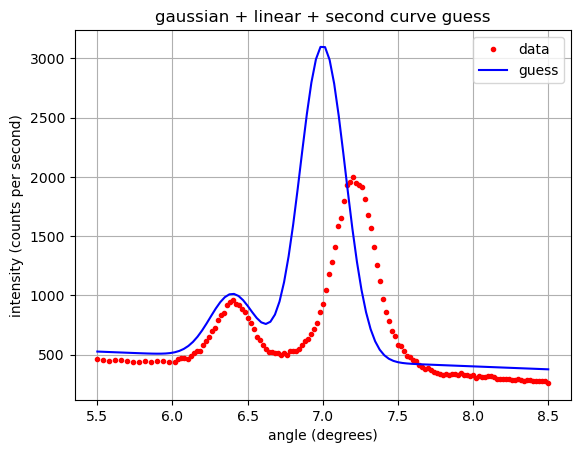

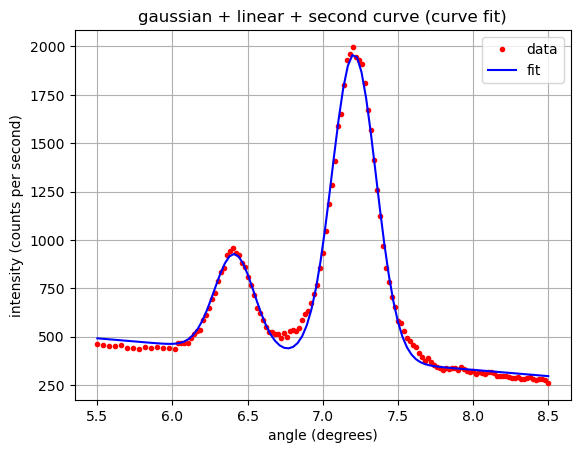

In [35]:
'''
6.
[4] Repeat, but allowing not only for a linear background to improve the fit, 
but also trying to fit the other peak together with the main one.
'''
'''
def gau3(x, intensity3, mu3, sigma3, m_gau3, c_gau3, intensity2, mu2, sigma2):
    gau2= intensity2 * (1/(sigma2*np.sqrt(2*np.pi))) * np.exp(-(x-mu2)**2/(2*sigma2**2)) 
    #gau3 = gau_linear(x, intensity3, mu3, sigma3, m_gau3, c_gau3) + gau2(x, intensity2, mu2, sigma2)
    return gau2(x, intensity3, mu3, sigma3)+ m_gau3*x + c_gau3 + gau2(x, intensity2, mu2, sigma2)
'''


def gau3(x, intensity3, mu3, sigma3, m_gau3, c_gau3, intensity2, mu2, sigma2):
    return gau(x, intensity3, mu3, sigma3) + m_gau3*x + c_gau3 + gau(x, intensity2, mu2, sigma2)

I3_guess= 1000
mu3_guess= 7.0
sigma3_guess= 0.15

m_gau3_guess = -50
c_gau3_guess = 800

I2_guess= 200
mu2_guess= 6.4
sigma2_guess= 0.15

p_guess_gau3 = np.array([I3_guess, mu3_guess, sigma3_guess, m_gau3_guess, c_gau3_guess, I2_guess, mu2_guess, sigma2_guess]) # initial guesses for I, mu, m and c
y_guess_gau3 = gau3(x_plot_gau, *p_guess_gau3) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot guess data
plt.plot(x_plot_gau, y_guess_gau3, 'b-',label='guess') 
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + linear + second curve guess')
plt.legend()
plt.grid ()


# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(gau3, x_data_gau, y_data_gau, p_guess_gau3, \
                      bounds= ([],[])) # do fit
I3, mu3, sigma3, m3, c3, I2, mu2, sigma2 = popt
# uncertanties of I, mu, and sigma
dI3, dmu3, dsigma3, dm3, dc3, dI2, dmu2, dsigma2 =  np.sqrt(pcov.diagonal())

print("Gaussian + linear (larger curve)")
print(f"I larger curve (area): {I3:.2f} +/- {dI3:.2f}")
print(f"mu larger curve (deg): {mu3:.2f} +/- {dmu3:.2f}")
print(f"sigma larger curve (deg) : {sigma3:.2f} +/- {dsigma3:.2f}")
print()
print(f"m (slope) larger curve: {m3:.2f} +/- {dm3:.2f}")
print(f"c (intercept) larger curve: {c3:.2f} +/- {dc3:.2f}")
print()
print("Gaussian (smaller curve)")
print(f"I smaller curve (area): {I2:.2f} +/- {dI2:.2f}")
print(f"mu smaller curve (deg): {mu2:.2f} +/- {dmu2:.2f}")
print(f"sigma smaller curve (deg) : {sigma2:.2f} +/- {dsigma2:.2f}")
print()

#plot fitted line
x_plot_gau3 = np.linspace(min(x_data_gau),max(x_data_gau),num=100)
# find fitted curve by creating an array yfit of data points ...
yfit_gau3 = gau3(x_plot_gau3, *popt)

# plot 
plt.figure()
plt.plot(x_data_gau, y_data_gau, 'r.',label='data')
# plot fit
plt.plot(x_plot_gau, yfit_gau3, 'b-',label='fit')
plt.xlabel('angle (degrees)')
plt.ylabel('intensity (counts per second)')
plt.title('gaussian + linear + second curve (curve fit)')
plt.legend()
plt.grid ();